# Extract list of Neighbourhood of Calgary from Wikipedia

In [168]:
import pandas as pd


In [169]:
url="https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary"
dfs=pd.read_html(url)

In [170]:
len(dfs)

3

In [171]:
dfs[0].head()

,Name[10],Quadrant,Sector[11],Ward[12],Type[11],2012 PopulationRank,Population(2012)[10],Population(2011)[10],% change,Dwellings(2012)[10],Area(km2)[11],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2


In [172]:
df=dfs[0]
df.head()

,Name[10],Quadrant,Sector[11],Ward[12],Type[11],2012 PopulationRank,Population(2012)[10],Population(2011)[10],% change,Dwellings(2012)[10],Area(km2)[11],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2


In [173]:
df1=df[["Name[10]","Type[11]"]]
df1.head()

,Name[10],Type[11]
0,Abbeydale,Residential
1,Acadia,Residential
2,Albert Park/Radisson Heights,Residential
3,Altadore,Residential
4,Alyth/Bonnybrook,Industrial


In [174]:
df1.columns=["Neighbourhood","Type"]
df1.head()

,Neighbourhood,Type
0,Abbeydale,Residential
1,Acadia,Residential
2,Albert Park/Radisson Heights,Residential
3,Altadore,Residential
4,Alyth/Bonnybrook,Industrial


# Different Types of Neighbourhood

In [175]:
df1_count=df1.groupby("Type").count().reset_index()
df1_count[["Neighbourhood","Type"]]

,Neighbourhood,Type
0,42,Industrial
1,4,Major Park
2,197,Residential
3,14,Residual Area
4,1,Total City of Calgary


# Only Residential Neighbourhood

In [176]:
df2=df1[df1["Type"]=="Residential"]
df2.head()

,Neighbourhood,Type
0,Abbeydale,Residential
1,Acadia,Residential
2,Albert Park/Radisson Heights,Residential
3,Altadore,Residential
5,Applewood Park,Residential


In [177]:
df2=df2[["Neighbourhood"]]
df2.head()

,Neighbourhood
0,Abbeydale
1,Acadia
2,Albert Park/Radisson Heights
3,Altadore
5,Applewood Park


In [178]:
len(df2)

197

# Extract the Latitude and the Longitude from the Calgary Open Data

In [179]:
df_coo=pd.read_json("https://data.calgary.ca/resource/j9ps-fyst.json")
df_coo.head()

,class,class_code,comm_code,name,sector,srg,comm_structure,longitude,latitude,location,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4,:@computed_region_p8tp_5dkv,:@computed_region_kxmf_bzkv,:@computed_region_dyj4_ed5g
0,Residential,1,YKV,YORKVILLE,SOUTH,DEVELOPING,BUILDING OUT,-114.076648,50.870403,"{'latitude': '50.87040344687566', 'longitude':...",1,6,6,53,1.0
1,Residential,1,WWO,WOLF WILLOW,SOUTH,DEVELOPING,BUILDING OUT,-114.008637,50.870724,"{'latitude': '50.870724299120106', 'longitude'...",3,6,13,227,1.0
2,Residential,1,WSP,WEST SPRINGS,WEST,DEVELOPING,BUILDING OUT,-114.206168,51.059732,"{'latitude': '51.05973239845048', 'longitude':...",1,1,14,114,11.0
3,Residential,1,WOO,WOODLANDS,SOUTH,BUILT-OUT,1980s/1990s,-114.106339,50.942876,"{'latitude': '50.94287588247354', 'longitude':...",1,5,6,216,8.0
4,Residential,1,WND,WINDSOR PARK,CENTRE,BUILT-OUT,1950s,-114.083550,51.005040,"{'latitude': '51.005040465360054', 'longitude'...",1,8,5,144,16.0


In [180]:
df_coo1=df_coo[df_coo["class"]=="Residential"]

In [181]:
len(df_coo1)

218

In [182]:
df_coo1=df_coo1[["name","longitude","latitude"]]
df_coo1

,name,longitude,latitude
0,YORKVILLE,-114.076648,50.870403
1,WOLF WILLOW,-114.008637,50.870724
2,WEST SPRINGS,-114.206168,51.059732
3,WOODLANDS,-114.106339,50.942876
4,WINDSOR PARK,-114.083550,51.005040
...,...,...,...
258,ALPINE PARK,-114.146538,50.917037
259,ALBERT PARK/RADISSON HEIGHTS,-113.996784,51.044542
260,ACADIA,-114.053702,50.972407
261,AMBLETON,-114.112071,51.186884


In [183]:
len(df_coo1)

218

In [184]:
df_coo1.columns=["Neighbourhood","Longitude","Latitude"]
df_coo1.head()

,Neighbourhood,Longitude,Latitude
0,YORKVILLE,-114.076648,50.870403
1,WOLF WILLOW,-114.008637,50.870724
2,WEST SPRINGS,-114.206168,51.059732
3,WOODLANDS,-114.106339,50.942876
4,WINDSOR PARK,-114.083550,51.005040


# Calgary Latitude and Longitude Values

In [185]:
# find out the latitude and longitude of Calgary
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Calgary, Canada'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


# Display all the Neighbourhood on the Map

In [186]:
import folium
import numpy as np
map_calgary=folium.Map(location=[51.0534234,-114.0625892],zoom_start=10)
for lat, lng,neighbourhood in zip(df_coo1["Latitude"],df_coo1["Longitude"],df1["Neighbourhood"]):
    label='{}'.format(neighbourhood)
    label=folium.Popup(label,parser_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color='blue',fill=True,
                       fill_color="#3186cf",fill_opacity=0.7,
                       parse_html=False).add_to(map_calgary)
map_calgary.save("calgary_map.html")
map_calgary

# Extract all the Venue details from Foursquare API

In [286]:
import requests
CLIENT_ID="HH2HW3YU1E1GWY4SHPUNCFSDRY0110IDXSSKTSANBS52BO15"
CLIENT_SECRET="CKLI2LSMK0VXFHZACNC5OIAQMY5OLH3HX14FUBMRWVQYR4PC"
VERSION="20180605"
radius=1000
LIMIT=100
def getNearbyVenues(names,latitudes,longitudes,radius=500):
    venues_list=[]
    for name,lat,lng in zip(names,latitudes,longitudes):
        url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        results=requests.get(url).json()["response"]["groups"][0]["items"]
        print(results)
        venues_list.append([(
            name,lat,lng,v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns=['Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude',
                          'Venue','Venue Langitude','Venue Longitude','Venue Category']
    return(nearby_venues)
c_venues=getNearbyVenues(names=df_coo1['Neighbourhood'],latitudes=df_coo1['Latitude'],
                  longitudes=df_coo1['Longitude'])

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5d60551e712c29000859d67c', 'name': 'Mattamy Homes - Yorkville', 'location': {'address': '19515 Sheriff King Street SW', 'lat': 50.8699969, 'lng': -114.0709358, 'labeledLatLngs': [{'label': 'display', 'lat': 50.8699969, 'lng': -114.0709358}], 'distance': 403, 'postalCode': 'T2X 0T9', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['19515 Sheriff King Street SW', 'Calgary AB T2X 0T9', 'Canada']}, 'categories': [{'id': '545419b1498ea6ccd0202f58', 'name': 'Home Service', 'pluralName': 'Home Services & Repairs', 'shortName': 'Home Services', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/hardware_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5d60551e712c29000859d67c-0'}]
[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b2066ddf964a520da3124e3', 'name': '3 Crowns', 'location': {'address': '523 Woodpark Blvd SW', 'lat': 50.94076522497254, 'lng': -114.10942985486153, 'labeledLatLngs': [{'label': 'display', 'lat': 50.94076522497254, 'lng': -114.10942985486153}], 'distance': 319, 'postalCode': 'T2W 4J3', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['523 Woodpark Blvd SW', 'Calgary AB T2W 4J3', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b2066ddf964a520da3124e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'g

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586f1f964a5202b7722e3', 'name': 'The Winston Golf Club', 'location': {'address': '2502-6 Street North East', 'lat': 51.074662872523895, 'lng': -114.04615094112465, 'labeledLatLngs': [{'label': 'display', 'lat': 51.074662872523895, 'lng': -114.04615094112465}], 'distance': 309, 'postalCode': 'T2E 3Z3', 'cc': 'CA', 'neighborhood': 'Winston Heights/Mountview', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2502-6 Street North East', 'Calgary AB T2E 3Z3', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0586f1f964a5202b7722e3-0'}, {'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '586ba8919b7eac1aa28e0e22', 'name': 'Pro - Developments', 'location': {'address': '3-55 Whitehorn Pl', 'lat': 51.086316, 'lng': -113.967181, 'labeledLatLngs': [{'label': 'display', 'lat': 51.086316, 'lng': -113.967181}], 'distance': 340, 'postalCode': 'T1Y 2J1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3-55 Whitehorn Pl', 'Calgary AB T1Y 2J1', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-586ba8919b7eac1aa28e0e22-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '549da7b7498e3a6606b44806', 'name': 'The Dandy Brewing Co', 'location': {'address': '#11 1826 25th Ave NE', 'lat': 51.075077818483585, 'lng': -114.01465678779516, 'labeledLatLngs': [{'label': 'display', 'lat': 51.075077818483585, 'lng': -114.01465678779516}], 'distance': 410, 'postalCode': 'T2E 7K1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['#11 1826 25th Ave NE', 'Calgary AB T2E 7K1', 'Canada']}, 'categories': [{'id': '50327c8591d4c4b30a586d5d', 'name': 'Brewery', 'pluralName': 'Breweries', 'shortName': 'Brewery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-549da7b7498e3a6606b44806-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0f2a3ff964a520e35f23e3', 'name': "Moose McGuire's", 'location': {'address': '1941 Uxbridge Dr NW', 'crossStreet': 'at Unwin Rd NW', 'lat': 51.07025299554782, 'lng': -114.13042655137606, 'labeledLatLngs': [{'label': 'display', 'lat': 51.07025299554782, 'lng': -114.13042655137606}], 'distance': 186, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1941 Uxbridge Dr NW (at Unwin Rd NW)', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0f2a3ff964a520e35f23e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'gene

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '503d4007e4b070a51688be38', 'name': 'Twelve Mile Coulee', 'location': {'lat': 51.12500588316921, 'lng': -114.24183800243223, 'labeledLatLngs': [{'label': 'display', 'lat': 51.12500588316921, 'lng': -114.24183800243223}], 'distance': 351, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-503d4007e4b070a51688be38-0'}]
[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b91d1b0f964a5207ad933e3', 'name': 'Shoppers Drug Mart', 'location': {'a

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a1476fdb1ec130700286a07', 'name': 'Modern West Plumbing & Heating Inc', 'location': {'address': '60 Templeridge Way NE', 'lat': 51.0896089, 'lng': -113.9488844, 'labeledLatLngs': [{'label': 'display', 'lat': 51.0896089, 'lng': -113.9488844}], 'distance': 173, 'postalCode': 'T1Y 4C8', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['60 Templeridge Way NE', 'Calgary AB T1Y 4C8', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5a1476fdb1ec130700286a07-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'T

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b3d4309f964a5202f9125e3', 'name': 'Strathcona community centre', 'location': {'address': '277 Strathcona Drive SW', 'lat': 51.047141758855986, 'lng': -114.18018623994399, 'labeledLatLngs': [{'label': 'display', 'lat': 51.047141758855986, 'lng': -114.18018623994399}], 'distance': 186, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['277 Strathcona Drive SW', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d130941735', 'name': 'Building', 'pluralName': 'Buildings', 'shortName': 'Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b3d4309f964a5202f9125e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'rea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55b2c1fc498e1bf8cf78682d', 'name': 'Vendome Cafe', 'location': {'address': '940 2 Avenue NW', 'lat': 51.05513753948826, 'lng': -114.08332312101305, 'labeledLatLngs': [{'label': 'display', 'lat': 51.05513753948826, 'lng': -114.08332312101305}], 'distance': 333, 'postalCode': 'T2N 0E6', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['940 2 Avenue NW', 'Calgary AB T2N 0E6', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55b2c1fc498e1bf8cf78682d-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalIn

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56101ce0498e048a43431a2a', 'name': 'The Pie Junkie', 'location': {'address': '8 Spruce Centre SW', 'lat': 51.0481791270504, 'lng': -114.13645905521902, 'labeledLatLngs': [{'label': 'display', 'lat': 51.0481791270504, 'lng': -114.13645905521902}], 'distance': 2, 'cc': 'CA', 'neighborhood': 'Spruce Cliff', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8 Spruce Centre SW', 'Calgary AB', 'Canada']}, 'categories': [{'id': '52e81612bcbc57f1066b7a0a', 'name': 'Pie Shop', 'pluralName': 'Pie Shops', 'shortName': 'Pie Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pieshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-56101ce0498e048a43431a2a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fb19046e4b0aa4c168f229f', 'name': 'International Avenue @ 26th Street SE', 'location': {'lat': 51.037318080242116, 'lng': -113.99581950454781, 'labeledLatLngs': [{'label': 'display', 'lat': 51.037318080242116, 'lng': -113.99581950454781}], 'distance': 367, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d1fe931735', 'name': 'Bus Station', 'pluralName': 'Bus Stations', 'shortName': 'Bus Station', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4fb19046e4b0aa4c168f229f-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c6c0b852d9976b0ae73103a', 'name': "

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b212695f964a520623724e3', 'name': 'The Sentry Box', 'location': {'address': '1835 10 Ave SW', 'lat': 51.044462, 'lng': -114.103432, 'labeledLatLngs': [{'label': 'display', 'lat': 51.044462, 'lng': -114.103432}], 'distance': 217, 'postalCode': 'T3C 0K2', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1835 10 Ave SW', 'Calgary AB T3C 0K2', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1fb941735', 'name': 'Hobby Shop', 'pluralName': 'Hobby Shops', 'shortName': 'Hobbies', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/hobbyshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b212695f964a520623724e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionRe

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586e9f964a520e17422e3', 'name': 'Battalion Park', 'location': {'address': '3001 Signal Hill Drive Southwest', 'lat': 51.02150286457277, 'lng': -114.17391300201416, 'labeledLatLngs': [{'label': 'display', 'lat': 51.02150286457277, 'lng': -114.17391300201416}], 'distance': 402, 'postalCode': 'T3H 2X5', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3001 Signal Hill Drive Southwest', 'Calgary AB T3H 2X5', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0586e9f964a520e17422e3-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popul

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57ef682b498e48e0cdfe479b', 'name': 'DreamWest Homes', 'location': {'address': '22 Shawnee Cres SW', 'lat': 50.925689, 'lng': -114.082336, 'labeledLatLngs': [{'label': 'display', 'lat': 50.925689, 'lng': -114.082336}], 'distance': 250, 'postalCode': 'T2Y 1W3', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['22 Shawnee Cres SW', 'Calgary AB T2Y 1W3', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57ef682b498e48e0cdfe479b-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd36671046076b0c7017671', 'name': 'Shaganappi Golf Course', 'location': {'address': '1200 26 St SW', 'lat': 51.04474067957084, 'lng': -114.12383770448746, 'labeledLatLngs': [{'label': 'display', 'lat': 51.04474067957084, 'lng': -114.12383770448746}], 'distance': 203, 'postalCode': 'T3C 1K1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1200 26 St SW', 'Calgary AB T3C 1K1', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '34845339'}}, 'referralId': 'e-0-4bd36671046076b0c7017671-0'}, {'reasons': {'count': 0, 'items': [{'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5bf22a8959c423002c388ccf', 'name': 'Industrial One', 'location': {'address': 'Sandpiper Point Nw', 'lat': 51.13757738439643, 'lng': -114.09284859895706, 'labeledLatLngs': [{'label': 'display', 'lat': 51.13757738439643, 'lng': -114.09284859895706}], 'distance': 148, 'postalCode': 'T3K 4L7', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Sandpiper Point Nw', 'Calgary AB T3K 4L7', 'Canada']}, 'categories': [{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'Mobile Phone Shop', 'pluralName': 'Mobile Phone Shops', 'shortName': 'Mobile Phones', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mobilephoneshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5bf22a8959c423002c388ccf-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d545e059e508cfadbb7f29a', 'name': 'Urban Texture', 'location': {'address': '175 Royal Birch Circle NW', 'lat': 51.143427, 'lng': -114.220256, 'labeledLatLngs': [{'label': 'display', 'lat': 51.143427, 'lng': -114.220256}], 'distance': 91, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['175 Royal Birch Circle NW', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d10c951735', 'name': 'Cosmetics Shop', 'pluralName': 'Cosmetics Shops', 'shortName': 'Cosmetics', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/beauty_cosmetic_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d545e059e508cfadbb7f29a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractio

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '563d62b5cd10809c4b03042f', 'name': 'Oishii Sushi', 'location': {'address': '8338 18 St. SE, 338', 'lat': 50.977113, 'lng': -114.013396, 'labeledLatLngs': [{'label': 'display', 'lat': 50.977113, 'lng': -114.013396}], 'distance': 339, 'postalCode': 'T2C 4E4', 'cc': 'CA', 'neighborhood': 'Riverbend', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['8338 18 St. SE, 338', 'Calgary AB T2C 4E4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-563d62b5cd10809c4b03042f-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'ty

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c05b97691d776b045e8f7f9', 'name': "Wood's Park", 'location': {'address': 'Elbow Drive', 'lat': 51.02744138037547, 'lng': -114.07756805419922, 'labeledLatLngs': [{'label': 'display', 'lat': 51.02744138037547, 'lng': -114.07756805419922}], 'distance': 361, 'cc': 'CA', 'city': 'Division No. 6', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Elbow Drive', 'Division No. 6 AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c05b97691d776b045e8f7f9-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b68f323f964a52079942be3', 'name': 'Dairy Queen', 'location': {'address': '4105 Bow Trail SW', 'lat': 51.04622536106951, 'lng': -114.14551109075546, 'labeledLatLngs': [{'label': 'display', 'lat': 51.04622536106951, 'lng': -114.14551109075546}], 'distance': 327, 'postalCode': 'T3C 2E9', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4105 Bow Trail SW', 'Calgary AB T3C 2E9', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b68f323f964a52079942be3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'g

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bbffc6f4cdfc9b6f15a9221', 'name': "Stavro's Restaurant & Bar", 'location': {'address': '7750 Ranchview Dr. NW', 'lat': 51.12074999055426, 'lng': -114.17957277041198, 'labeledLatLngs': [{'label': 'display', 'lat': 51.12074999055426, 'lng': -114.17957277041198}], 'distance': 331, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7750 Ranchview Dr. NW', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bbffc6f4cdfc9b6f15a9221-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57812c32498e8701c1e635a4', 'name': '7-Eleven', 'location': {'address': '4105 4th St NW', 'lat': 51.08809883632997, 'lng': -114.07233640551573, 'labeledLatLngs': [{'label': 'display', 'lat': 51.08809883632997, 'lng': -114.07233640551573}], 'distance': 493, 'postalCode': 'T2K 1A3', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['4105 4th St NW', 'Calgary AB T2K 1A3', 'Canada']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57812c32498e8701c1e635a4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popula

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e8673f5d66a9b178e910c44', 'name': 'Petro-Canada', 'location': {'address': '1120 137 Ave SE', 'lat': 50.927701, 'lng': -114.02957, 'labeledLatLngs': [{'label': 'display', 'lat': 50.927701, 'lng': -114.02957}], 'distance': 493, 'postalCode': 'T2J 6T6', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1120 137 Ave SE', 'Calgary AB T2J 6T6', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d113951735', 'name': 'Gas Station', 'pluralName': 'Gas Stations', 'shortName': 'Gas Station', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e8673f5d66a9b178e910c44-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c54beb04623be9a71f83cf3', 'name': 'Lics Icecream', 'location': {'lat': 51.0580435225695, 'lng': -114.13665135609087, 'labeledLatLngs': [{'label': 'display', 'lat': 51.0580435225695, 'lng': -114.13665135609087}], 'distance': 251, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c54beb04623be9a71f83cf3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586e7f964a520257422e3', 'name': 'Lazy Loaf and Kettle', 'loca

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6cce3cf964a520b3552ce3', 'name': 'Treasures of Saigon', 'location': {'address': '6432 Old Band Coach Road SW', 'lat': 51.060721435395585, 'lng': -114.1798301655114, 'labeledLatLngs': [{'label': 'display', 'lat': 51.060721435395585, 'lng': -114.1798301655114}], 'distance': 397, 'postalCode': 'T3H 2H4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6432 Old Band Coach Road SW', 'Calgary AB T3H 2H4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d14a941735', 'name': 'Vietnamese Restaurant', 'pluralName': 'Vietnamese Restaurants', 'shortName': 'Vietnamese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b6cce3cf964a520b3552ce3-0'}, {'reasons': {'count': 0, 'items':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e67c038ae609d64bd06bb09', 'name': 'Alpha Comics', 'location': {'address': '#9, 7005 – 18th St. SE', 'lat': 50.9903967274354, 'lng': -114.0160182425632, 'labeledLatLngs': [{'label': 'display', 'lat': 50.9903967274354, 'lng': -114.0160182425632}], 'distance': 307, 'postalCode': 'T2C 1Y1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['#9, 7005 – 18th St. SE', 'Calgary AB T2C 1Y1', 'Canada']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b18', 'name': 'Comic Shop', 'pluralName': 'Comic Shops', 'shortName': 'Comic Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/comic_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '47969192'}}, 'referralId': 'e-0-4e67c038ae609d64bd06bb09-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'Th

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '509ad960e4b021f5bf40b90a', 'name': 'North Haven', 'location': {'lat': 51.099503985125864, 'lng': -114.08822474354066, 'labeledLatLngs': [{'label': 'display', 'lat': 51.099503985125864, 'lng': -114.08822474354066}], 'distance': 278, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4f2a25ac4b909258e854f55f', 'name': 'Neighborhood', 'pluralName': 'Neighborhoods', 'shortName': 'Neighborhood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-509ad960e4b021f5bf40b90a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f94c193e4b01cffa2a33554', 'name': 'North Haven P

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f418575e4b062d5ccdbcacf', 'name': 'New Brighton Pond Park', 'location': {'lat': 50.920325716029666, 'lng': -113.94470463585337, 'labeledLatLngs': [{'label': 'display', 'lat': 50.920325716029666, 'lng': -113.94470463585337}], 'distance': 195, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4f418575e4b062d5ccdbcacf-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f7f90b0e4b0c0cb029b9b02', 'name': 'ymca saddletown', 'location': {'l

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e037fc918a819eb596797a2', 'name': '4th Spot Kitchen & Bar', 'location': {'address': '2620 4 St. NW', 'crossStreet': 'at 26 Ave. NW', 'lat': 51.075881401343665, 'lng': -114.07118088735403, 'labeledLatLngs': [{'label': 'display', 'lat': 51.075881401343665, 'lng': -114.07118088735403}], 'distance': 427, 'postalCode': 'T2M 3A1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2620 4 St. NW (at 26 Ave. NW)', 'Calgary AB T2M 3A1', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e037fc918a819eb596797a2-0'}, {'reasons': {'count': 0, 'items': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c59e4d4d3aee21eb1606955', 'name': 'Shaw-nee Slopes', 'location': {'lat': 50.91849918942579, 'lng': -114.08209421350035, 'labeledLatLngs': [{'label': 'display', 'lat': 50.91849918942579, 'lng': -114.08209421350035}], 'distance': 255, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c59e4d4d3aee21eb1606955-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '572e

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b800fbdf964a520a64e30e3', 'name': 'Value Village', 'location': {'address': '240 Midpark Way SE', 'crossStreet': 'Midlake blvd', 'lat': 50.91379208976939, 'lng': -114.0619120572048, 'labeledLatLngs': [{'label': 'display', 'lat': 50.91379208976939, 'lng': -114.0619120572048}], 'distance': 434, 'postalCode': 'T2X 1N4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['240 Midpark Way SE (Midlake blvd)', 'Calgary AB T2X 1N4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d101951735', 'name': 'Thrift / Vintage Store', 'pluralName': 'Thrift / Vintage Stores', 'shortName': 'Thrift / Vintage', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b800fbdf964a520a64e30e3-0'}, {'reasons'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '515e0835e4b00b600b696cfb', 'name': 'Paskapoo', 'location': {'lat': 51.07495453619159, 'lng': -114.20084797203471, 'labeledLatLngs': [{'label': 'display', 'lat': 51.07495453619159, 'lng': -114.20084797203471}], 'distance': 485, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-515e0835e4b00b600b696cfb-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6244a1f964a5207f3f2ae3', 'name': 'Brewsters McKenzie Towne', 'location': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5daf3949da1f720008679cdd', 'name': 'Insight Dynamic Solutions Inc', 'location': {'address': '5 Mt Alberta View SE', 'lat': 50.916665, 'lng': -113.988689, 'labeledLatLngs': [{'label': 'display', 'lat': 50.916665, 'lng': -113.988689}], 'distance': 201, 'postalCode': 'T2Z 3G6', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5 Mt Alberta View SE', 'Calgary AB T2Z 3G6', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5daf3949da1f720008679cdd-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ca51f87a6e08cfa91686e94', 'name': 'Petro-Canada', 'location': {'address': '839 19 St NE', 'lat': 51.059246, 'lng': -114.01362, 'labeledLatLngs': [{'label': 'display', 'lat': 51.059246, 'lng': -114.01362}], 'distance': 177, 'postalCode': 'T2E 4X4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['839 19 St NE', 'Calgary AB T2E 4X4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d113951735', 'name': 'Gas Station', 'pluralName': 'Gas Stations', 'shortName': 'Gas Station', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ca51f87a6e08cfa91686e94-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c75b5fac219224b776ea328', 'name': 'Macewan Park Dog Run', 'location': {'lat': 51.135538, 'lng': -114.109699, 'labeledLatLngs': [{'label': 'display', 'lat': 51.135538, 'lng': -114.109699}], 'distance': 456, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e5941735', 'name': 'Dog Run', 'pluralName': 'Dog Runs', 'shortName': 'Dog Run', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/dogrun_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c75b5fac219224b776ea328-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c8abc86e51e6dcbd9ca6bde', 'name': 'Macewan Chinese And Thai Foods', 'location': {'lat': 51.135

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5781c2c5498e99a1c2c6daf5', 'name': 'Made By Marcus', 'location': {'lat': 51.03780820812762, 'lng': -114.08528690894876, 'labeledLatLngs': [{'label': 'display', 'lat': 51.03780820812762, 'lng': -114.08528690894876}], 'distance': 170, 'postalCode': 'T2T 0A7', 'cc': 'CA', 'neighborhood': 'Mount Royal', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Calgary AB T2T 0A7', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5781c2c5498e99a1c2c6daf5-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonNam

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d17c87ebb488cfa07aaafd4', 'name': 'Lincoln Park Liquor', 'location': {'lat': 51.00341810240033, 'lng': -114.12963195325908, 'labeledLatLngs': [{'label': 'display', 'lat': 51.00341810240033, 'lng': -114.12963195325908}], 'distance': 404, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d186941735', 'name': 'Liquor Store', 'pluralName': 'Liquor Stores', 'shortName': 'Liquor Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d17c87ebb488cfa07aaafd4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '535c4fec498e7dc63220071a', 'name': 'Wintasay Spa, Med

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5e543636494b99000809f0df', 'name': 'Shane Homes - Legacy', 'location': {'address': '9 Legacy Glen Row SE', 'lat': 50.85811287751214, 'lng': -114.00141775878032, 'labeledLatLngs': [{'label': 'display', 'lat': 50.85811287751214, 'lng': -114.00141775878032}], 'distance': 326, 'postalCode': 'T2X 3C9', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['9 Legacy Glen Row SE', 'Calgary AB T2X 3C9', 'Canada']}, 'categories': [{'id': '5032885091d4c4b30a586d66', 'name': 'Real Estate Office', 'pluralName': 'Real Estate Offices', 'shortName': 'Real Estate', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5e543636494b99000809f0df-0'}]
[]
[]
[{'reasons': {'count': 0, 'items': [{'summar

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bdb59adc79cc928f75082e9', 'name': "Francesco's Italian Market", 'location': {'address': '3413 26th Ave SW', 'crossStreet': '34th St', 'lat': 51.02987644554054, 'lng': -114.13615874219445, 'labeledLatLngs': [{'label': 'display', 'lat': 51.02987644554054, 'lng': -114.13615874219445}], 'distance': 362, 'postalCode': 'T3E 0N3', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['3413 26th Ave SW (34th St)', 'Calgary AB T3E 0N3', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bdb59adc79cc928f75082e9-0'}, {'reasons': {'count': 0, 'items':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be0fc72c1732d7fd20b5b9a', 'name': '7-Eleven', 'location': {'address': '6820 4 St NW', 'lat': 51.11392239049671, 'lng': -114.07076060771942, 'labeledLatLngs': [{'label': 'display', 'lat': 51.11392239049671, 'lng': -114.07076060771942}], 'distance': 496, 'postalCode': 'T2K 1C2', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6820 4 St NW', 'Calgary AB T2K 1C2', 'Canada']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4be0fc72c1732d7fd20b5b9a-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bb28526715eef3bb15a85bb', 'name': 'Bun King Bakery', 'location': {'lat': 51.093353929535006, 'lng': -114.07971300183341, 'labeledLatLngs': [{'label': 'display', 'lat': 51.093353929535006, 'lng': -114.07971300183341}], 'distance': 112, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bb28526715eef3bb15a85bb-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bb4178b49bdc9b6528c0c10', 'name': 'Yoga Santosha', 'location': {'address'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cfedae775d3236a6e45e2f7', 'name': 'Haysboro Community Centre', 'location': {'address': '1204 89 Avenue SW', 'lat': 50.97464189931855, 'lng': -114.08784567356211, 'labeledLatLngs': [{'label': 'display', 'lat': 50.97464189931855, 'lng': -114.08784567356211}], 'distance': 414, 'postalCode': 'T2V 0W4', 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['1204 89 Avenue SW', 'T2V 0W4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d168941735', 'name': 'Skating Rink', 'pluralName': 'Skating Rinks', 'shortName': 'Skating Rink', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/skatingrink_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cfedae775d3236a6e45e2f7-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonNa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b60e329f964a520d0ff29e3', 'name': 'A&W', 'location': {'address': '422 McKnight Blvd NE', 'lat': 51.096406, 'lng': -114.055124, 'labeledLatLngs': [{'label': 'display', 'lat': 51.096406, 'lng': -114.055124}], 'distance': 237, 'postalCode': 'T2K 6A6', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['422 McKnight Blvd NE', 'Calgary AB T2K 6A6', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b60e329f964a520d0ff29e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName':

[]
[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b9330c2f964a5204f3a34e3', 'name': 'Co-op Liquor Store', 'location': {'crossStreet': 'Richmond Road & 48 St. SW', 'lat': 51.018925, 'lng': -114.156307, 'labeledLatLngs': [{'label': 'display', 'lat': 51.018925, 'lng': -114.156307}], 'distance': 449, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d186941735', 'name': 'Liquor Store', 'pluralName': 'Liquor Stores', 'shortName': 'Liquor Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b9330c2f964a5204f3a34e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venu

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d17c87ebb488cfa07aaafd4', 'name': 'Lincoln Park Liquor', 'location': {'lat': 51.00341810240033, 'lng': -114.12963195325908, 'labeledLatLngs': [{'label': 'display', 'lat': 51.00341810240033, 'lng': -114.12963195325908}], 'distance': 344, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d186941735', 'name': 'Liquor Store', 'pluralName': 'Liquor Stores', 'shortName': 'Liquor Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d17c87ebb488cfa07aaafd4-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b75ab78f964a520af1b2ee3', 'name': 'Pho Dau Bo', 'lo

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6ed29bf964a52011cc2ce3', 'name': "Mac's", 'location': {'address': '5260 Falsbridge Gate NE', 'lat': 51.10144749348943, 'lng': -113.94953805843072, 'labeledLatLngs': [{'label': 'display', 'lat': 51.10144749348943, 'lng': -113.94953805843072}], 'distance': 285, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['5260 Falsbridge Gate NE', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b6ed29bf964a52011cc2ce3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reaso

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '513a328ae412a333c7db6074', 'name': 'Calgary Cabinets', 'location': {'address': '16 Everoak Close S.W.', 'lat': 50.91520999618578, 'lng': -114.11293029785156, 'labeledLatLngs': [{'label': 'display', 'lat': 50.91520999618578, 'lng': -114.11293029785156}], 'distance': 423, 'postalCode': 'T2Y 0C4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['16 Everoak Close S.W.', 'Calgary AB T2Y 0C4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1f8941735', 'name': 'Furniture / Home Store', 'pluralName': 'Furniture / Home Stores', 'shortName': 'Furniture / Home', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-513a328ae412a333c7db6074-0'}, {'reasons': {'count': 0, 'items': [{'summar

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '59154700e1f0aa603a3054f7', 'name': 'Blumer Homes', 'location': {'address': '79 Edforth Rd NW', 'lat': 51.125265, 'lng': -114.142815, 'labeledLatLngs': [{'label': 'display', 'lat': 51.125265, 'lng': -114.142815}], 'distance': 109, 'postalCode': 'T3A 3V8', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['79 Edforth Rd NW', 'Calgary AB T3A 3V8', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-59154700e1f0aa603a3054f7-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'gener

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586e9f964a520c17422e3', 'name': 'Heritage Park Historical Village', 'location': {'address': '1900 Heritage Dr. SW', 'lat': 50.98260026715583, 'lng': -114.1014549641312, 'labeledLatLngs': [{'label': 'display', 'lat': 50.98260026715583, 'lng': -114.1014549641312}], 'distance': 314, 'postalCode': 'T2V 2X3', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1900 Heritage Dr. SW', 'Calgary AB T2V 2X3', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d190941735', 'name': 'History Museum', 'pluralName': 'History Museums', 'shortName': 'History Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '57645740'}}, 'referralId': 'e-0-4b0586e9f964a520c17422e3-0'}

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dec33f388774880e34a7d94', 'name': 'Deer Ridge off-leash', 'location': {'lat': 50.92402467792777, 'lng': -114.01440962081927, 'labeledLatLngs': [{'label': 'display', 'lat': 50.92402467792777, 'lng': -114.01440962081927}], 'distance': 497, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e5941735', 'name': 'Dog Run', 'pluralName': 'Dog Runs', 'shortName': 'Dog Run', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/dogrun_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4dec33f388774880e34a7d94-0'}]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52640d19498ec3

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5581a7e4498ea507a6e7cf30', 'name': 'Phil & Sebastian Coffee Roasters', 'location': {'address': 'Simmons Bldg, 618 Confluence Way SE', 'crossStreet': '5 Ave', 'lat': 51.04781647691753, 'lng': -114.05009213492788, 'labeledLatLngs': [{'label': 'display', 'lat': 51.04781647691753, 'lng': -114.05009213492788}], 'distance': 97, 'postalCode': 'T2G 0G1', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Simmons Bldg, 618 Confluence Way SE (5 Ave)', 'Calgary AB T2G 0G1', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5581a7e4498ea507a6e7cf30-

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '566f9b18498eafd7d1193e2d', 'name': 'Cactus Club Cafe', 'location': {'address': '340', 'crossStreet': '8 Avenue SW', 'lat': 51.04596611898667, 'lng': -114.07016605249063, 'labeledLatLngs': [{'label': 'display', 'lat': 51.04596611898667, 'lng': -114.07016605249063}], 'distance': 150, 'postalCode': 'T2P 2Y9', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['340 (8 Avenue SW)', 'Calgary AB T2P 2Y9', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-566f9b18498eafd7d1193e2d-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4eb72927775b544c280b5788', 'name': 'Griffith Store', 'location': {'lat': 51.0158656320732, 'lng': -114.21362042427062, 'labeledLatLngs': [{'label': 'display', 'lat': 51.0158656320732, 'lng': -114.21362042427062}], 'distance': 211, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['Calgary AB', 'Canada']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4eb72927775b544c280b5788-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': 

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50070570e4b0a592819c7ed9', 'name': 'Crestmont Spray Park', 'location': {'lat': 51.087262, 'lng': -114.262015, 'labeledLatLngs': [{'label': 'display', 'lat': 51.087262, 'lng': -114.262015}], 'distance': 267, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e7941735', 'name': 'Playground', 'pluralName': 'Playgrounds', 'shortName': 'Playground', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/playground_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50070570e4b0a592819c7ed9-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '503fc716e4b0f30040c407ea', 'name': 'Crestmont Park', 'location': {'lat': 51.083

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be72b352468c928682f0243', 'name': 'Good Earth Coffeehouse', 'location': {'address': '356 Cranston Rd', 'lat': 50.87967295413597, 'lng': -113.97636066077122, 'labeledLatLngs': [{'label': 'display', 'lat': 50.87967295413597, 'lng': -113.97636066077122}], 'distance': 302, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['356 Cranston Rd', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4be72b352468c928682f0243-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bc9df

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55bbaae3498e97575d6451be', 'name': 'Marco Roofing Ltd', 'location': {'address': '115 Covepark Dr', 'lat': 51.167638699846805, 'lng': -114.05297756195067, 'labeledLatLngs': [{'label': 'display', 'lat': 51.167638699846805, 'lng': -114.05297756195067}], 'distance': 304, 'postalCode': 'T3K 5Z5', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['115 Covepark Dr', 'Calgary AB T3K 5Z5', 'Canada']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55bbaae3498e97575d6451be-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6cce3cf964a520b3552ce3', 'name': 'Treasures of Saigon', 'location': {'address': '6432 Old Band Coach Road SW', 'lat': 51.060721435395585, 'lng': -114.1798301655114, 'labeledLatLngs': [{'label': 'display', 'lat': 51.060721435395585, 'lng': -114.1798301655114}], 'distance': 342, 'postalCode': 'T3H 2H4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6432 Old Band Coach Road SW', 'Calgary AB T3H 2H4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d14a941735', 'name': 'Vietnamese Restaurant', 'pluralName': 'Vietnamese Restaurants', 'shortName': 'Vietnamese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b6cce3cf964a520b3552ce3-0'}, {'reasons': {'count': 0, 'items': [{

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b533dabf964a520b39327e3', 'name': 'Tim Hortons', 'location': {'address': '6510 Country Hills Nw', 'crossStreet': 'Nose Hill Dr.', 'lat': 51.1419898914604, 'lng': -114.18252356350422, 'labeledLatLngs': [{'label': 'display', 'lat': 51.1419898914604, 'lng': -114.18252356350422}], 'distance': 295, 'postalCode': 'T3G 4R8', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6510 Country Hills Nw (Nose Hill Dr.)', 'Calgary AB T3G 4R8', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b533dabf964a520b39327e3-0'}]
[{'reasons': {'count': 0, 'it

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51943e1c498e06c0e14428e8', 'name': 'Massage Heights Southland Crossing', 'location': {'lat': 51.043573037362734, 'lng': -114.17384798006424, 'labeledLatLngs': [{'label': 'display', 'lat': 51.043573037362734, 'lng': -114.17384798006424}], 'distance': 336, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'Massage Studio', 'pluralName': 'Massage Studios', 'shortName': 'Massage Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-51943e1c498e06c0e14428e8-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e6f61d5d4c06eaf9c26fdbd', 'name': 'Ch

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5260747f11d27346ed1830f2', 'name': 'Banzai Japanese restaurant', 'location': {'address': '7724 Elbow Drive SW', 'lat': 50.984973249420236, 'lng': -114.08241066636123, 'labeledLatLngs': [{'label': 'display', 'lat': 50.984973249420236, 'lng': -114.08241066636123}], 'distance': 499, 'postalCode': 'T2V 1K2', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7724 Elbow Drive SW', 'Calgary AB T2V 1K2', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5260747f11d27346ed1830f2-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'Thi

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be34f751dd22d7f385796bd', 'name': 'Karamel Salon & Spa', 'location': {'lat': 51.067875921878716, 'lng': -114.20805592144862, 'labeledLatLngs': [{'label': 'display', 'lat': 51.067875921878716, 'lng': -114.20805592144862}], 'distance': 450, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '4bf58dd8d48988d10c951735', 'name': 'Cosmetics Shop', 'pluralName': 'Cosmetics Shops', 'shortName': 'Cosmetics', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/beauty_cosmetic_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4be34f751dd22d7f385796bd-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '567984a2498e34d0063775ff', 'name': 'Ace Coffee

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '53234d35498e1e6849429567', 'name': 'Bus Stop 5976', 'location': {'lat': 50.939323, 'lng': -114.084211, 'labeledLatLngs': [{'label': 'display', 'lat': 50.939323, 'lng': -114.084211}], 'distance': 374, 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'Bus Stop', 'pluralName': 'Bus Stops', 'shortName': 'Bus Stop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-53234d35498e1e6849429567-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f333a69e4b02be5067f4d69', 'name': "Domino's Pizza", 'location': {'address': '1053 Canyon Meadows Dr SW

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586e9f964a520cb7422e3', 'name': 'South Glenmore Park', 'location': {'address': '90 Ave. SW', 'crossStreet': '24th St.', 'lat': 50.97465064860971, 'lng': -114.12105116252017, 'labeledLatLngs': [{'label': 'display', 'lat': 50.97465064860971, 'lng': -114.12105116252017}], 'distance': 496, 'postalCode': 'T2N 1J4', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['90 Ave. SW (24th St.)', 'Calgary AB T2N 1J4', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0586e9f964a520cb7422e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54457979498e5391918f06c4', 'name': 'Village Ice Cream', 'location': {'address': '820 49 Ave. SW', 'crossStreet': 'Britannia Plaza', 'lat': 51.009683588054585, 'lng': -114.08268720965626, 'labeledLatLngs': [{'label': 'display', 'lat': 51.009683588054585, 'lng': -114.08268720965626}], 'distance': 418, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['820 49 Ave. SW (Britannia Plaza)', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-54457979498e5391918f06c4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b56145cf964a52058ff27e3', 'name': 'Tazza Deli & Grill', 'location': {'address': '1105 1 Ave NE', 'lat': 51.053136429564454, 'lng': -114.03731721740319, 'labeledLatLngs': [{'label': 'display', 'lat': 51.053136429564454, 'lng': -114.03731721740319}], 'distance': 326, 'postalCode': 'T2E 0C9', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['1105 1 Ave NE', 'Calgary AB T2E 0C9', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '33352152'}}, 'referralId': 'e-0-4b56145cf964a52058ff27e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bca7966b6c49c7439b59091', 'name': 'Famoso Neapolitan Pizzeria', 'location': {'address': '2303', 'crossStreet': '4 Street', 'lat': 51.03247453902227, 'lng': -114.10610652847038, 'labeledLatLngs': [{'label': 'display', 'lat': 51.03247453902227, 'lng': -114.10610652847038}], 'distance': 405, 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2303 (4 Street)', 'Calgary AB', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bca7966b6c49c7439b59091-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonNam

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '518ae730454a31c3d02f473d', 'name': 'Zen 8 Grill', 'location': {'address': '421 -12 Ave SE', 'crossStreet': '3rd St SE', 'lat': 51.040703926949696, 'lng': -114.05439432998274, 'labeledLatLngs': [{'label': 'display', 'lat': 51.040703926949696, 'lng': -114.05439432998274}], 'distance': 366, 'postalCode': 'T2G 1AG', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['421 -12 Ave SE (3rd St SE)', 'Calgary AB T2G 1AG', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restaurants', 'shortName': 'Asian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '55694891'}}, 'referralId': 'e-0-518ae730454a31c3d02f473d-0'}, {'reasons': {'c

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5081c1fbf4709d35a81da316', 'name': 'Zumiez', 'location': {'address': '6455 Macleod Trail SW', 'lat': 50.999613905382155, 'lng': -114.08654869091663, 'labeledLatLngs': [{'label': 'display', 'lat': 50.999613905382155, 'lng': -114.08654869091663}], 'distance': 168, 'postalCode': 'T2H 0K8', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['6455 Macleod Trail SW', 'Calgary AB T2H 0K8', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d103951735', 'name': 'Clothing Store', 'pluralName': 'Clothing Stores', 'shortName': 'Apparel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5081c1fbf4709d35a81da316-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'typ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0586f0f964a520d17622e3', 'name': 'Amaranth Whole Foods Market', 'location': {'address': '7 Arbour Lake Dr. N.W.', 'lat': 51.13364683955764, 'lng': -114.20383569133219, 'labeledLatLngs': [{'label': 'display', 'lat': 51.13364683955764, 'lng': -114.20383569133219}], 'distance': 294, 'postalCode': 'T3G 5G8', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['7 Arbour Lake Dr. N.W.', 'Calgary AB T3G 5G8', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0586f0f964a520d17622e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b135e8af964a520ab9623e3', 'name': 'Garrison Pub', 'location': {'address': '2040 42 Avenue Sw', 'lat': 51.01613050366704, 'lng': -114.10867442058723, 'labeledLatLngs': [{'label': 'display', 'lat': 51.01613050366704, 'lng': -114.10867442058723}], 'distance': 477, 'postalCode': 'T2T 2M7', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['2040 42 Avenue Sw', 'Calgary AB T2T 2M7', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b135e8af964a520ab9623e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'glo

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fad705de4b068aefdbf12b6', 'name': 'Subway', 'location': {'address': '826-68 St NE', 'lat': 51.05923895116167, 'lng': -113.93442341268587, 'labeledLatLngs': [{'label': 'display', 'lat': 51.05923895116167, 'lng': -113.93442341268587}], 'distance': 464, 'postalCode': 'T2A 6X7', 'cc': 'CA', 'city': 'Calgary', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['826-68 St NE', 'Calgary AB T2A 6X7', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4fad705de4b068aefdbf12b6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reaso

In [305]:
len(c_venues)

1241

In [306]:
c_venues.shape

(1241, 7)

In [307]:
c_venues.head()


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Langitude,Venue Longitude,Venue Category
0,YORKVILLE,50.870403,-114.076648,Mattamy Homes - Yorkville,50.869997,-114.070936,Home Service
1,WEST SPRINGS,51.059732,-114.206168,My Favourite Ice Cream Shop,51.061317,-114.209994,Ice Cream Shop
2,WEST SPRINGS,51.059732,-114.206168,Fergus & Bix Restaurant and Beer Market,51.059953,-114.212111,Restaurant
3,WEST SPRINGS,51.059732,-114.206168,Starbucks,51.060318,-114.212768,Coffee Shop
4,WEST SPRINGS,51.059732,-114.206168,Boston Pizza,51.062335,-114.210770,Pizza Place


In [308]:
c_venues_count=c_venues.groupby("Neighbourhood").count().reset_index()
c_venues_count=c_venues_count[["Neighbourhood","Venue Category"]]
c_venues_count.head()

,Neighbourhood,Venue Category
0,ABBEYDALE,4
1,ACADIA,2
2,ALBERT PARK/RADISSON HEIGHTS,4
3,ALTADORE,4
4,APPLEWOOD PARK,5


In [309]:
c_venues_nor=pd.get_dummies(c_venues[["Venue Category"]],prefix="",prefix_sep="")
c_venues_nor["Neighbourhood"]=c_venues["Neighbourhood"]
f=[c_venues_nor.columns[-1]]+list(c_venues_nor.columns[:-1])
c_venues_nor=c_venues_nor[f]
c_venues_nor.head(10)

,Neighbourhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,YORKVILLE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,WEST SPRINGS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
print("There are {} unique categories.".format(len(c_venues['Venue Category'].unique())))

There are 226 unique categories.


In [311]:
c_venues_nor.shape

(1241, 227)

In [312]:
c_venues_grp=c_venues_nor.groupby("Neighbourhood").mean().reset_index()
c_venues_grp

,Neighbourhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ABBEYDALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
1,ACADIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,ALBERT PARK/RADISSON HEIGHTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,ALTADORE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,APPLEWOOD PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,WINDSOR PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
182,WINSTON HEIGHTS/MOUNTVIEW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
183,WOODBINE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
184,WOODLANDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [313]:
c_venues_grp.shape

(186, 227)

# Find the top 10 venues of each Neighbourhood

In [314]:
num_top_venues=10
for hood in c_venues_grp["Neighbourhood"]:
    print("--------"+hood+"---------")
    cp=c_venues_grp[c_venues_grp["Neighbourhood"]==hood].T.reset_index()
    cp.columns=["Venue","freq"]
    cp=cp.iloc[1:]
    cp['freq']=cp['freq'].astype(float)
    cp=cp.round({'freq':2})
    print(cp.sort_values("freq",ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")
    

--------ABBEYDALE---------
                     Venue  freq
0              Wings Joint  0.25
1  Health & Beauty Service  0.25
2           Sandwich Place  0.25
3        Convenience Store  0.25
4        Accessories Store  0.00
5    Performing Arts Venue  0.00
6                Nightclub  0.00
7             Noodle House  0.00
8     Other Great Outdoors  0.00
9        Other Repair Shop  0.00


--------ACADIA---------
                   Venue  freq
0   Gym / Fitness Center   0.5
1                   Pool   0.5
2      Accessories Store   0.0
3  Performing Arts Venue   0.0
4              Nightclub   0.0
5           Noodle House   0.0
6   Other Great Outdoors   0.0
7      Other Repair Shop   0.0
8  Outdoors & Recreation   0.0
9        Paintball Field   0.0


--------ALBERT PARK/RADISSON HEIGHTS---------
                   Venue  freq
0     Light Rail Station  0.25
1          Train Station  0.25
2  Performing Arts Venue  0.25
3           Home Service  0.25
4      Accessories Store  0.00
5        

9                      Palace  0.00


--------CRANSTON---------
              Venue  freq
0               Pub  0.11
1      Liquor Store  0.11
2              Café  0.11
3  Sushi Restaurant  0.11
4       Coffee Shop  0.11
5       Gas Station  0.11
6     Grocery Store  0.11
7    Sandwich Place  0.11
8         Pet Store  0.11
9         Piano Bar  0.00


--------CRESCENT HEIGHTS---------
                 Venue  freq
0       Scenic Lookout  0.17
1                 Bank  0.08
2         Noodle House  0.08
3                  Pub  0.08
4     Sushi Restaurant  0.08
5                 Park  0.08
6       Sandwich Place  0.08
7                Trail  0.08
8   Falafel Restaurant  0.08
9  Japanese Restaurant  0.08


--------CRESTMONT---------
                     Venue  freq
0               Playground   1.0
1        Accessories Store   0.0
2    Performing Arts Venue   0.0
3  New American Restaurant   0.0
4                Nightclub   0.0
5             Noodle House   0.0
6     Other Great Outdoors   0.0
7 

                   Venue  freq
0                 School  0.17
1               Pharmacy  0.17
2            Art Gallery  0.17
3          Deli / Bodega  0.17
4             Hobby Shop  0.17
5      Convenience Store  0.17
6   Other Great Outdoors  0.00
7      Other Repair Shop  0.00
8  Outdoors & Recreation  0.00
9        Paintball Field  0.00


--------KINCORA---------
                     Venue  freq
0               Playground   1.0
1        Accessories Store   0.0
2    Performing Arts Venue   0.0
3  New American Restaurant   0.0
4                Nightclub   0.0
5             Noodle House   0.0
6     Other Great Outdoors   0.0
7        Other Repair Shop   0.0
8    Outdoors & Recreation   0.0
9          Paintball Field   0.0


--------KINGSLAND---------
              Venue  freq
0               Pub  0.07
1  Sushi Restaurant  0.07
2       Coffee Shop  0.07
3       Pizza Place  0.07
4              Café  0.03
5       Gas Station  0.03
6          Pharmacy  0.03
7    Breakfast Spot  0.03
8    C

                   Venue  freq
0             Playground  0.67
1            Coffee Shop  0.33
2      Accessories Store  0.00
3              Pet Store  0.00
4           Noodle House  0.00
5   Other Great Outdoors  0.00
6      Other Repair Shop  0.00
7  Outdoors & Recreation  0.00
8        Paintball Field  0.00
9                 Palace  0.00


--------RICHMOND---------
                     Venue  freq
0    Performing Arts Venue   1.0
1        Accessories Store   0.0
2         Ramen Restaurant   0.0
3  New American Restaurant   0.0
4                Nightclub   0.0
5             Noodle House   0.0
6     Other Great Outdoors   0.0
7        Other Repair Shop   0.0
8    Outdoors & Recreation   0.0
9          Paintball Field   0.0


--------RIDEAU PARK---------
                     Venue  freq
0                     Park   1.0
1        Accessories Store   0.0
2         Ramen Restaurant   0.0
3  New American Restaurant   0.0
4                Nightclub   0.0
5             Noodle House   0.0
6     

                    Venue  freq
0       Convenience Store  0.11
1      Italian Restaurant  0.11
2              Hobby Shop  0.11
3            Liquor Store  0.11
4             Pizza Place  0.11
5               Pet Store  0.11
6           Deli / Bodega  0.11
7               Gift Shop  0.11
8  Furniture / Home Store  0.11
9                  Palace  0.00


--------WEST SPRINGS---------
                Venue  freq
0         Coffee Shop  0.20
1       Grocery Store  0.13
2            Pharmacy  0.07
3    Tapas Restaurant  0.07
4  Salon / Barbershop  0.07
5      Ice Cream Shop  0.07
6      Breakfast Spot  0.07
7        Liquor Store  0.07
8          Restaurant  0.07
9  Italian Restaurant  0.07


--------WHITEHORN---------
                        Venue  freq
0                   Rest Area  0.25
1                 Pizza Place  0.25
2                 Gas Station  0.25
3  Construction & Landscaping  0.25
4           Accessories Store  0.00
5                   Pet Store  0.00
6                Noodle Hou

In [315]:
def return_most_common_venues(row, num_top_venues):
    row = row.iloc[1:]
    row_sorted = row.sort_values(ascending=False)
    
    return row_sorted.index.values[0:num_top_venues]

In [316]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = c_venues_grp['Neighbourhood']

for ind in np.arange(c_venues_grp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(c_venues_grp.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBEYDALE,Wings Joint,Health & Beauty Service,Convenience Store,Sandwich Place,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
1,ACADIA,Pool,Gym / Fitness Center,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
2,ALBERT PARK/RADISSON HEIGHTS,Home Service,Performing Arts Venue,Train Station,Light Rail Station,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
3,ALTADORE,Pub,Dog Run,Ice Cream Shop,Massage Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
4,APPLEWOOD PARK,Liquor Store,Construction & Landscaping,Trail,Park,Home Service,Frame Store,German Restaurant,Gastropub,Gas Station,Garden Center


#  Silhouette score to find the correct number of clusters

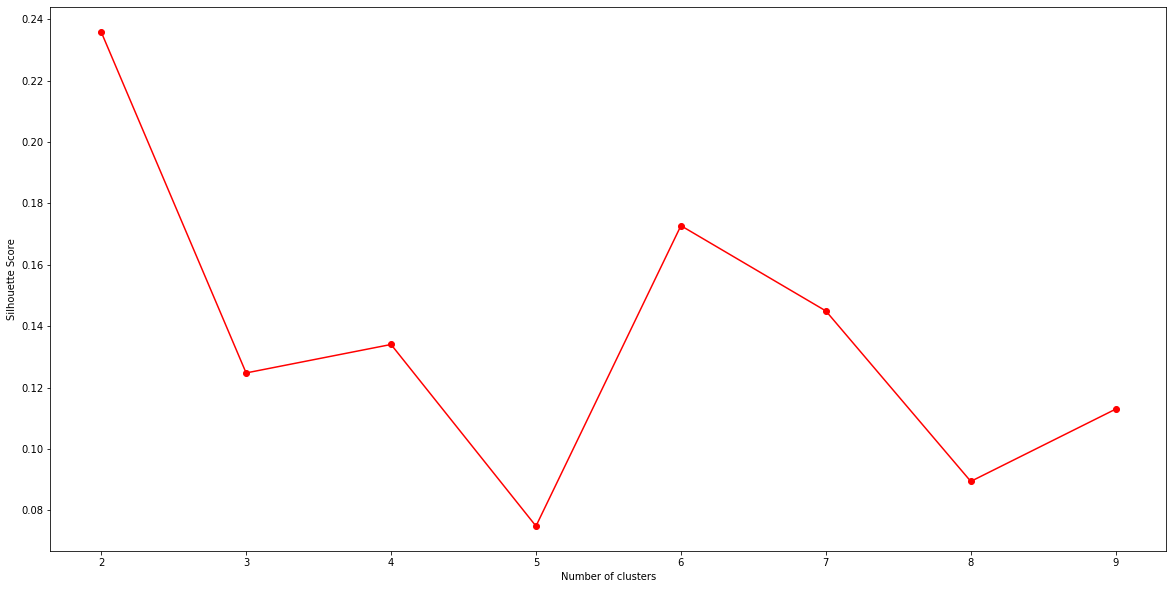

In [317]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
c_grouped_clustering = c_venues_grp.drop('Neighbourhood', 1)

max_score = 10
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(c_grouped_clustering)
    
    # Gets the silhouette score
    score = silhouette_score(c_grouped_clustering, kmeans)
    scores.append(score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()


# KMeans Clustering

In [403]:
from sklearn.cluster import KMeans
kclusters=4
ccl=c_venues_grp.drop("Neighbourhood",1)
kmeans=KMeans(n_clusters=kclusters,random_state=0).fit(ccl)
kmeans.labels_[:]


array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 0,
       0, 0, 2, 0, 0, 3, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 2])

In [404]:
nvenue_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


ValueError: cannot insert Cluster Labels, already exists

In [405]:
m=df_coo1
m.head()
m=m.join(nvenue_sorted.set_index("Neighbourhood"),on="Neighbourhood")

m=m.dropna()
m.head()

,Neighbourhood,Longitude,Latitude,Cluster Labels,1 - Most Common Venue,2 - Most Common Venue,3 - Most Common Venue,4 - Most Common Venue,5 - Most Common Venue,6 - Most Common Venue,7 - Most Common Venue,8 - Most Common Venue,9 - Most Common Venue,10 - Most Common Venue
0,YORKVILLE,-114.076648,50.870403,3.0,Home Service,Yoga Studio,Gourmet Shop,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
2,WEST SPRINGS,-114.206168,51.059732,3.0,Coffee Shop,Grocery Store,Italian Restaurant,Pharmacy,Gourmet Shop,Breakfast Spot,Tapas Restaurant,Salon / Barbershop,Restaurant,Liquor Store
3,WOODLANDS,-114.106339,50.942876,3.0,Food & Drink Shop,Pub,Liquor Store,Dog Run,Eastern European Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
4,WINDSOR PARK,-114.083550,51.005040,3.0,Restaurant,Beer Garden,Pharmacy,Golf Course,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
5,WILDWOOD,-114.158522,51.058251,1.0,Park,Dog Run,Trail,Yoga Studio,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center


In [406]:
m.to_csv(r"C:\Users\tskir\Desktop\photos\m.csv")

# Map all the clusters generated

In [421]:
import matplotlib.cm as cm
import matplotlib.colors as colors
mc=folium.Map(location=[latitude, longitude],zoom_start=10)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors=[]
for lat,lon,poi,cluster in zip(m['Latitude'],m['Longitude'],m['Neighbourhood'],m["Cluster Labels"]):
    label=folium.Popup(str(poi)+'Cluster'+str(cluster),parse_html=True)
    folium.CircleMarker(
    [lat,lon],radius=5,popup=label,fill=True,
    color=rainbow[int(cluster)-1],fill_opacity=0.7).add_to(mc)
mc


# Display details of all Clusters

In [423]:
print("Cluster 0")
m.loc[m["Cluster Labels"]==0,m.columns[[0]+list(range(4,m.shape[1]))]]


Cluster 0


,Neighbourhood,1 - Most Common Venue,2 - Most Common Venue,3 - Most Common Venue,4 - Most Common Venue,5 - Most Common Venue,6 - Most Common Venue,7 - Most Common Venue,8 - Most Common Venue,9 - Most Common Venue,10 - Most Common Venue
27,TARADALE,Playground,Residential Building (Apartment / Condo),Yoga Studio,Frame Store,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
64,SCARBORO,Burger Joint,Hobby Shop,Deli / Bodega,Playground,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
74,ROYAL OAK,Playground,Business Service,Cosmetics Shop,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
81,RENFREW,Playground,Coffee Shop,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
100,PALLISER,Baseball Field,Playground,River,Home Service,Frame Store,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
106,NORTH HAVEN,Neighborhood,Playground,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
145,KINCORA,Playground,Yoga Studio,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
198,DOVER,Diner,Baseball Field,Playground,Volleyball Court,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
209,CRESTMONT,Playground,Yoga Studio,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
250,BEDDINGTON HEIGHTS,Theater,Playground,Clothing Store,Yoga Studio,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe


In [437]:
print("+++Cluster 0+++")
cluster0 = m.loc[m['Cluster Labels'] == 0, m.columns[[0] + list(range(4, m.shape[1]))]]
venues0= (cluster0['1 - Most Common Venue'].append(
    cluster0['2 - Most Common Venue']).append(
    cluster0['3 - Most Common Venue']).append(
    cluster0['4 - Most Common Venue']).append(
    cluster0['5 - Most Common Venue']).append(
    cluster0['6 - Most Common Venue']).append(
    cluster0['7 - Most Common Venue']).append(
    cluster0['8 - Most Common Venue']).append(
    cluster0['9 - Most Common Venue']).append(
    cluster0['10 - Most Common Venue']))

print(venues0.value_counts().head(10))

+++Cluster 0+++
Playground                10
Gift Shop                 10
Gastropub                 10
Garden Center             10
Gas Station               10
German Restaurant         10
Yoga Studio                7
Gaming Cafe                6
French Restaurant          5
Gluten-free Restaurant     4
dtype: int64


In [426]:
print("Cluster 1")
m.loc[m["Cluster Labels"]==1,m.columns[[0]+list(range(4,m.shape[1]))]]

Cluster 1


,Neighbourhood,1 - Most Common Venue,2 - Most Common Venue,3 - Most Common Venue,4 - Most Common Venue,5 - Most Common Venue,6 - Most Common Venue,7 - Most Common Venue,8 - Most Common Venue,9 - Most Common Venue,10 - Most Common Venue
5,WILDWOOD,Park,Dog Run,Trail,Yoga Studio,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
15,VARSITY,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
21,UPPER MOUNT ROYAL,Athletics & Sports,Park,Yoga Studio,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
23,TUSCANY,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
52,SIGNAL HILL,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
63,SCENIC ACRES,Skating Rink,Park,Yoga Studio,Golf Course,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
79,RIDEAU PARK,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
109,NEW BRIGHTON,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
184,ELBOYA,Park,Yoga Studio,Discount Store,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
189,ERIN WOODS,Park,Sporting Goods Shop,Yoga Studio,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe


In [427]:
print("+++Cluster 1+++")
cluster1= m.loc[m['Cluster Labels'] == 1, m.columns[[0] + list(range(4, m.shape[1]))]]
venues1= (cluster1['1 - Most Common Venue'].append(
    cluster1['2 - Most Common Venue']).append(
    cluster1['3 - Most Common Venue']).append(
    cluster1['4 - Most Common Venue']).append(
    cluster1['5 - Most Common Venue']).append(
    cluster1['6 - Most Common Venue']).append(
    cluster1['7 - Most Common Venue']).append(
    cluster1['8 - Most Common Venue']).append(
    cluster1['9 - Most Common Venue']).append(
    cluster1['10 - Most Common Venue']))

print(venues1.value_counts().head(10))

+++Cluster 1+++
Gift Shop                 12
Park                      12
Gastropub                 12
Garden Center             12
Yoga Studio               12
German Restaurant         12
Gas Station               12
Gluten-free Restaurant    11
Gaming Cafe                8
Discount Store             6
dtype: int64


In [428]:
print("Cluster 2")
m.loc[m["Cluster Labels"]==2,m.columns[[0]+list(range(4,m.shape[1]))]].reset_index()

Cluster 2


,index,Neighbourhood,1 - Most Common Venue,2 - Most Common Venue,3 - Most Common Venue,4 - Most Common Venue,5 - Most Common Venue,6 - Most Common Venue,7 - Most Common Venue,8 - Most Common Venue,9 - Most Common Venue,10 - Most Common Venue
0,12,WOODBINE,Construction & Landscaping,Music Venue,BBQ Joint,Fried Chicken Joint,Golf Course,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
1,26,TEMPLE,Home Service,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
2,51,SILVER SPRINGS,Baseball Field,Rock Club,Construction & Landscaping,Home Service,Frame Store,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
3,54,SHAWNEE SLOPES,Physical Therapist,Construction & Landscaping,Tennis Court,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
4,72,RUNDLE,Pub,Business Service,Construction & Landscaping,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
5,91,PARKLAND,Gas Station,Construction & Landscaping,Yoga Studio,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Garden Center,Gaming Cafe
6,127,MCKENZIE LAKE,Bus Stop,Construction & Landscaping,Yoga Studio,Fried Chicken Joint,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
7,172,GLENBROOK,Baseball Field,Miscellaneous Shop,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
8,193,EDGEMONT,Construction & Landscaping,Café,Asian Restaurant,Yoga Studio,Fried Chicken Joint,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
9,204,DOUGLASDALE/GLEN,Construction & Landscaping,Yoga Studio,French Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe


In [431]:
print("+++Cluster 2+++")
cluster2 = m.loc[m['Cluster Labels'] == 2, m.columns[[0] + list(range(4, m.shape[1]))]]
venues2 = (cluster2['1 - Most Common Venue'].append(
    cluster2['2 - Most Common Venue']).append(
    cluster2['3 - Most Common Venue']).append(
    cluster2['4 - Most Common Venue']).append(
    cluster2['5 - Most Common Venue']).append(
    cluster2['6 - Most Common Venue']).append(
    cluster2['7 - Most Common Venue']).append(
    cluster2['8 - Most Common Venue']).append(
    cluster2['9 - Most Common Venue']).append(
    cluster2['10 - Most Common Venue']))

print(venues2.value_counts().head(10))

+++Cluster 2+++
Gift Shop                     12
Gastropub                     12
Gas Station                   12
German Restaurant             12
Construction & Landscaping    12
Garden Center                  9
Gluten-free Restaurant         9
Yoga Studio                    9
French Restaurant              4
Gaming Cafe                    4
dtype: int64


In [432]:
print("Cluster 3")
m.loc[m["Cluster Labels"]==3,m.columns[[0]+list(range(4,m.shape[1]))]]

Cluster 3


,Neighbourhood,1 - Most Common Venue,2 - Most Common Venue,3 - Most Common Venue,4 - Most Common Venue,5 - Most Common Venue,6 - Most Common Venue,7 - Most Common Venue,8 - Most Common Venue,9 - Most Common Venue,10 - Most Common Venue
0,YORKVILLE,Home Service,Yoga Studio,Gourmet Shop,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
2,WEST SPRINGS,Coffee Shop,Grocery Store,Italian Restaurant,Pharmacy,Gourmet Shop,Breakfast Spot,Tapas Restaurant,Salon / Barbershop,Restaurant,Liquor Store
3,WOODLANDS,Food & Drink Shop,Pub,Liquor Store,Dog Run,Eastern European Restaurant,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
4,WINDSOR PARK,Restaurant,Beer Garden,Pharmacy,Golf Course,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station
6,WINSTON HEIGHTS/MOUNTVIEW,Golf Course,Dog Run,Yoga Studio,Fried Chicken Joint,Gluten-free Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
...,...,...,...,...,...,...,...,...,...,...,...
256,APPLEWOOD PARK,Liquor Store,Construction & Landscaping,Trail,Park,Home Service,Frame Store,German Restaurant,Gastropub,Gas Station,Garden Center
257,ALTADORE,Pub,Dog Run,Ice Cream Shop,Massage Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center
259,ALBERT PARK/RADISSON HEIGHTS,Home Service,Performing Arts Venue,Train Station,Light Rail Station,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe
260,ACADIA,Pool,Gym / Fitness Center,Yoga Studio,French Restaurant,Gift Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Gaming Cafe


In [434]:
print("+++Cluster 3+++")
cluster3 = m.loc[m['Cluster Labels'] == 3, m.columns[[0] + list(range(4, m.shape[1]))]]
venues3 = (cluster3['1 - Most Common Venue'].append(
    cluster3['2 - Most Common Venue']).append(
    cluster3['3 - Most Common Venue']).append(
    cluster3['4 - Most Common Venue']).append(
    cluster3['5 - Most Common Venue']).append(
    cluster3['6 - Most Common Venue']).append(
    cluster3['7 - Most Common Venue']).append(
    cluster3['8 - Most Common Venue']).append(
    cluster3['9 - Most Common Venue']).append(
    cluster3['10 - Most Common Venue']))

print(venues3.value_counts().head(10))

+++Cluster 3+++
Gas Station               95
Gastropub                 92
German Restaurant         91
Gift Shop                 81
Yoga Studio               61
Garden Center             60
Gluten-free Restaurant    50
Coffee Shop               37
Gaming Cafe               37
French Restaurant         35
dtype: int64


# Deriving Insights from the clusters

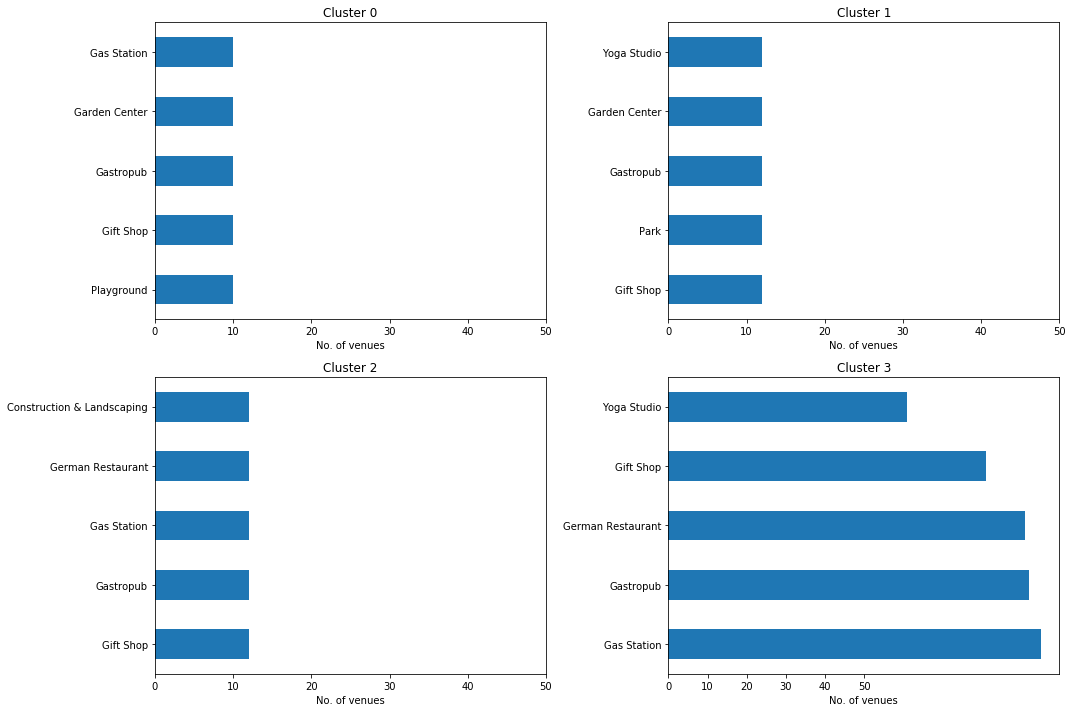

In [438]:
df_list = [venues0,venues1, venues2, venues3]
fig, axes = plt.subplots(2, 2)

count = 0
for r in range(2):
    for c in range(2):
        df_list[count].value_counts().head().plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('Cluster {}'.format(count))
        plt.sca(axes[r, c])
        plt.xticks(np.arange(0, 60,10 ))
        plt.xlabel('No. of venues')
        count += 1

fig.tight_layout()